# AULA 10 - **Linear Models for Classification**

---
### Linear Model for Binary Classifications



Considere-se o seguinte dataset com empréstimos. A Classe define se o pedido de empréstimo vai ou não entrar em default (não pagar).

<img src="images/class_2.png" style="width:40%"/>

### A pergunta a que qualquer modelo de classificação deve responder é:

> Conhecendo vários exemplares com a respectiva classificação (train_data ,train_target) quais são as classes de exemplares ainda desconhecidos?

<img src="images/classification.png" style="width:60%"/>



## Métodos de classificação que vamos estudar:

[ESTA AULA]

- Linear Model for Classification


[PROXIMAS AULAS]

- Random Forrest;
- Naive Bays (Bayesian Methods)
- KNN
- Kernel Methods


# Linear Model for Binary Classifications

---

### Contexto
Considere-se que temos um conjunto de $I$ registos, cada um chamado de $r_i$ com a sua classe $C_i$ = 0 ou 1 e com $D$ features.

$$r_i = (x_1)_i, (x_2)_i,(x_3)_i..., (x_D)_i$$

Se quisermos criar um modelo (uma função) cujo resultado estime a classe C de cada registo, 0 ou 1 consoante as conjunção das features, podemos genericamente defini-la como:

$$ M(r_i) \in \{0,1\}$$


<img src="images/Log_regr.png" style="width:50%" />


No entanto, tal como no caso da regressão, uma função linear $m(r)$ nos parâmteros obriga a que o resultado de uma combinação linear das features pertença a $\mathbb{R}$ (números reais), ou seja, 

$$ m(r) = w_1x_1 + w_2x_2 + ... + w_Dx_D + w_0$$

A função de custo pode ser a mesma que no caso da regressão. Poderia ser algo que minizava a seguinte função, onde se considera esta diferença para todos os registos conhecidos (de treino):

$$\sum_i^I{|m(r_i)-C_i|}$$

Mais uma vez, se em vez de um módulo (que tem uma descontinuidade em zero) usarmos o quadrado do erro de cada registo, obtemos:

$$Cost = \sum_i^I{(m(r_i)-C_i)^2}$$

Que, como vimos, é vulgarmente chamada de *Cost Function* (função de custo).

**Mas agora temos um problema: **

> Repare-se que o resutlado da nossa função $m(r) \in \mathbb{R}$ e $C \in {0,1}$ ou seja, a $m(r)$ não parece cumprir bem o seu objectivo de gerar uma estimativa de $C$, denomindad $\hat{C}$ em que $\hat{C} = m(r) \in {0,1} $ tal como $C$.

> Uma função de custo que funcione bem deve minimizar os erros entre a verdadeira classe $C_i$ e a sua estimativa $M(r_i)$. 


### Logistic Regression

> Atenção: Logistic regression é um método de CLASSIFICAÇÃO, apesar do nome *regression*!!!

O modelo de Regressão Logística considera que existe na mesma uma dependência linear das diversas features, ou seja, do tipo $f(x) = wx+b$. Com $D$ features, $m$ fica, tal como antes:

$$ m(r) = w_1x_1 + w_2x_2 + ... + w_Dx_D + w_0$$

ou seja, linear para cada feature com um bias $w_0$ tal como $b$ no caso $f(x) = wx+b$.


#### Mas o resultado de $m$ tem que ser ou 0 ou 1!


Para que isto aconteça, vamos aplicar uma função sigmoide, ou seja, algo assim:

$$\sigma(Z) = \frac{1}{1+e^{-Z}}$$

Que tem o seguinte aspecto:

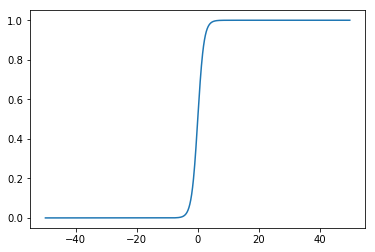

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
#sigmoid function
Z = np.arange(-50,50,.1)
Y = 1/(1+np.exp(-Z))
plt.plot(Z,Y, "-")
plt.show()

Aplicando $\sigma(m(r))$ estamos a dizer que qualquer valor resultante fica entre 0 e 1 (classe ou não-classe, tal como C). Esta é a nossa função estimativa:

$$ \hat{C} = M(r) = \sigma(m(r)) = \sigma(w_1x_1 + w_2x_2 + ... + w_Nx_N + w_0)$$

a função $\sigma$ chama-se genericamente de **função de activação** e permite-nos obter sempre valores entre 0 e 1 e:



$$\hat{C} = M(r) = \left\{ \begin{matrix} 1, & \sigma(m(r)) >= 0.5  \\ 0, & \sigma(m(r)) < 0.5  \end{matrix} \right.$$

----

Poeríamos adoptar a mesma estratégia da regressão no que diz respeito à função de custo:


$$ Cost = \sum_i^N{(\sigma(w^Tr)-C)^2}$$



### Dois comentários:

1. A função deixou de ser linear  nos parâmetros $w$ (como no caso da regressão linear) devido à função de activação, que é não linear. Ou seja, o cálculo das derivadas é mais complicado do que no caso da regressão, mas mais fácil do que outros modelos mais complexos.
2. A linha que separa as duas classes é do tipo $M(r) = constante$, ou seja, $\textbf{w}^T \textbf{x} + w_0 = constante$. Isto quer dizer que estamos perante uma linha que é linear em x.

----

No entanto, exitem 2 problemas para arranjarmos uma solução desta nova função: 


**1) Já não conseguimos encontrar uma expressão para os $w$ que minimize a função de custo (do género $w = (R^TR)^1R^Ty $ ) - Não existe!**

> Então como encontramos o mínimo da função de custo?
> Usamos métodos iterativos, que navegam para o mínimo (Gradient Descent). Em cada passo os nossos w (estimados) são actualizados tendo em conta a expressão:

> $$ w_{t+1}  = w_{t} - \mu \nabla_w Cost $$

> Onde $\nabla_w Cost$ é chamado de gradiente - a derivada da função de custo em ordem ao vector w:

> $$\frac{d Cost}{dw}$$

> e $\mu$ é o hiperparâmetro de aprednizagem (quanto maior mais depressa aprende). No entanto, quando demasiado grande deixa de funcionar:


> <img src="images/GD_4.png" style="width:100%"/> 
    

> Nesse caso, a função de custo tem que ser sempre "decrescente" para não ficar "presa" em vales, certo?
> Aqui entra o segundo problema:

**2) Devido à não linearidade de $\sigma$ esta função de custo **

> $$ Cost = \sum_i^N{(\sigma(w^Tr)-C)^2}$$

> deixou de ser "convexa", ou seja, já não tem 1 só mínimo, e compora-se assim:

> <img src="images/GD_1.png" style="width:30%"/> 

> Pelo que é muito dificil encontrar um mínimo... temos que arranjar uma função de custo que seja, convexa, como esta:

> <img src="images/GD_2.png" style="width:40%"/> 


---


A função de Custo que se usa para resolver o problema da regressão logística (que é convexa para este problema) é

$$Cost = \sum_i^N{[C \space log(\sigma(w^Tr)) + (1-C) \space log(1-\sigma(w^Tr)]}$$ 

A derivada é mais dificil de calcular. Temos que ter em conta que:

$$\frac{d\sigma(a)}{da} = \sigma(a)(1-\sigma(a))$$

e obtemos que:

$$\frac{d Cost}{dw_j} = (C-\sigma(w^Tr))x_j$$

Resta-nos aplicar esta expressão em 

$$ w_{t+1}  = w_{t} - \mu \nabla_w Cost $$

e obter recursivamente o nosso valor de w, após N iterações que nos levam a um resultado com um erro suficientemente bom. 


## Logistic Regression using sklearn


Vamos ver um exemplo para o caso dos dígitos. Vamos para já estimar se um dado caracter é ou não "6", com base num modelo do tipo Logistic Regression

In [7]:
%matplotlib notebook
from sklearn import datasets, linear_model, model_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Carregar os dados

data_digits = datasets.load_digits()
print(data_digits.data.shape)
print(data_digits.target.shape)

(1797, 64)
(1797,)


<IPython.core.display.Javascript object>


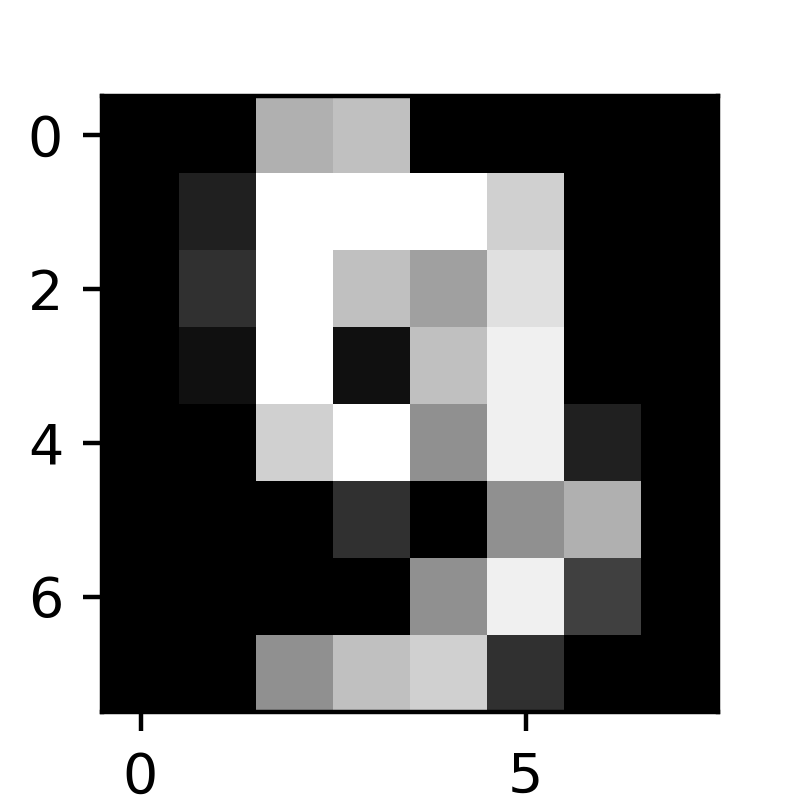

In [8]:
#criar dados a 1 para o caracter "6" e a 0 para todos os outros
new_target = np.zeros(data_digits.target.shape)
new_target[data_digits.target==6]=1
plt.figure(figsize=(2,2))
plt.imshow(data_digits.images[9,:,:], cmap='gray')

train sizes: (1257, 64)
test sizes: (540, 64)
actual:  [ 0.  1.]
predict: [ 1.  0.]


<IPython.core.display.Javascript object>


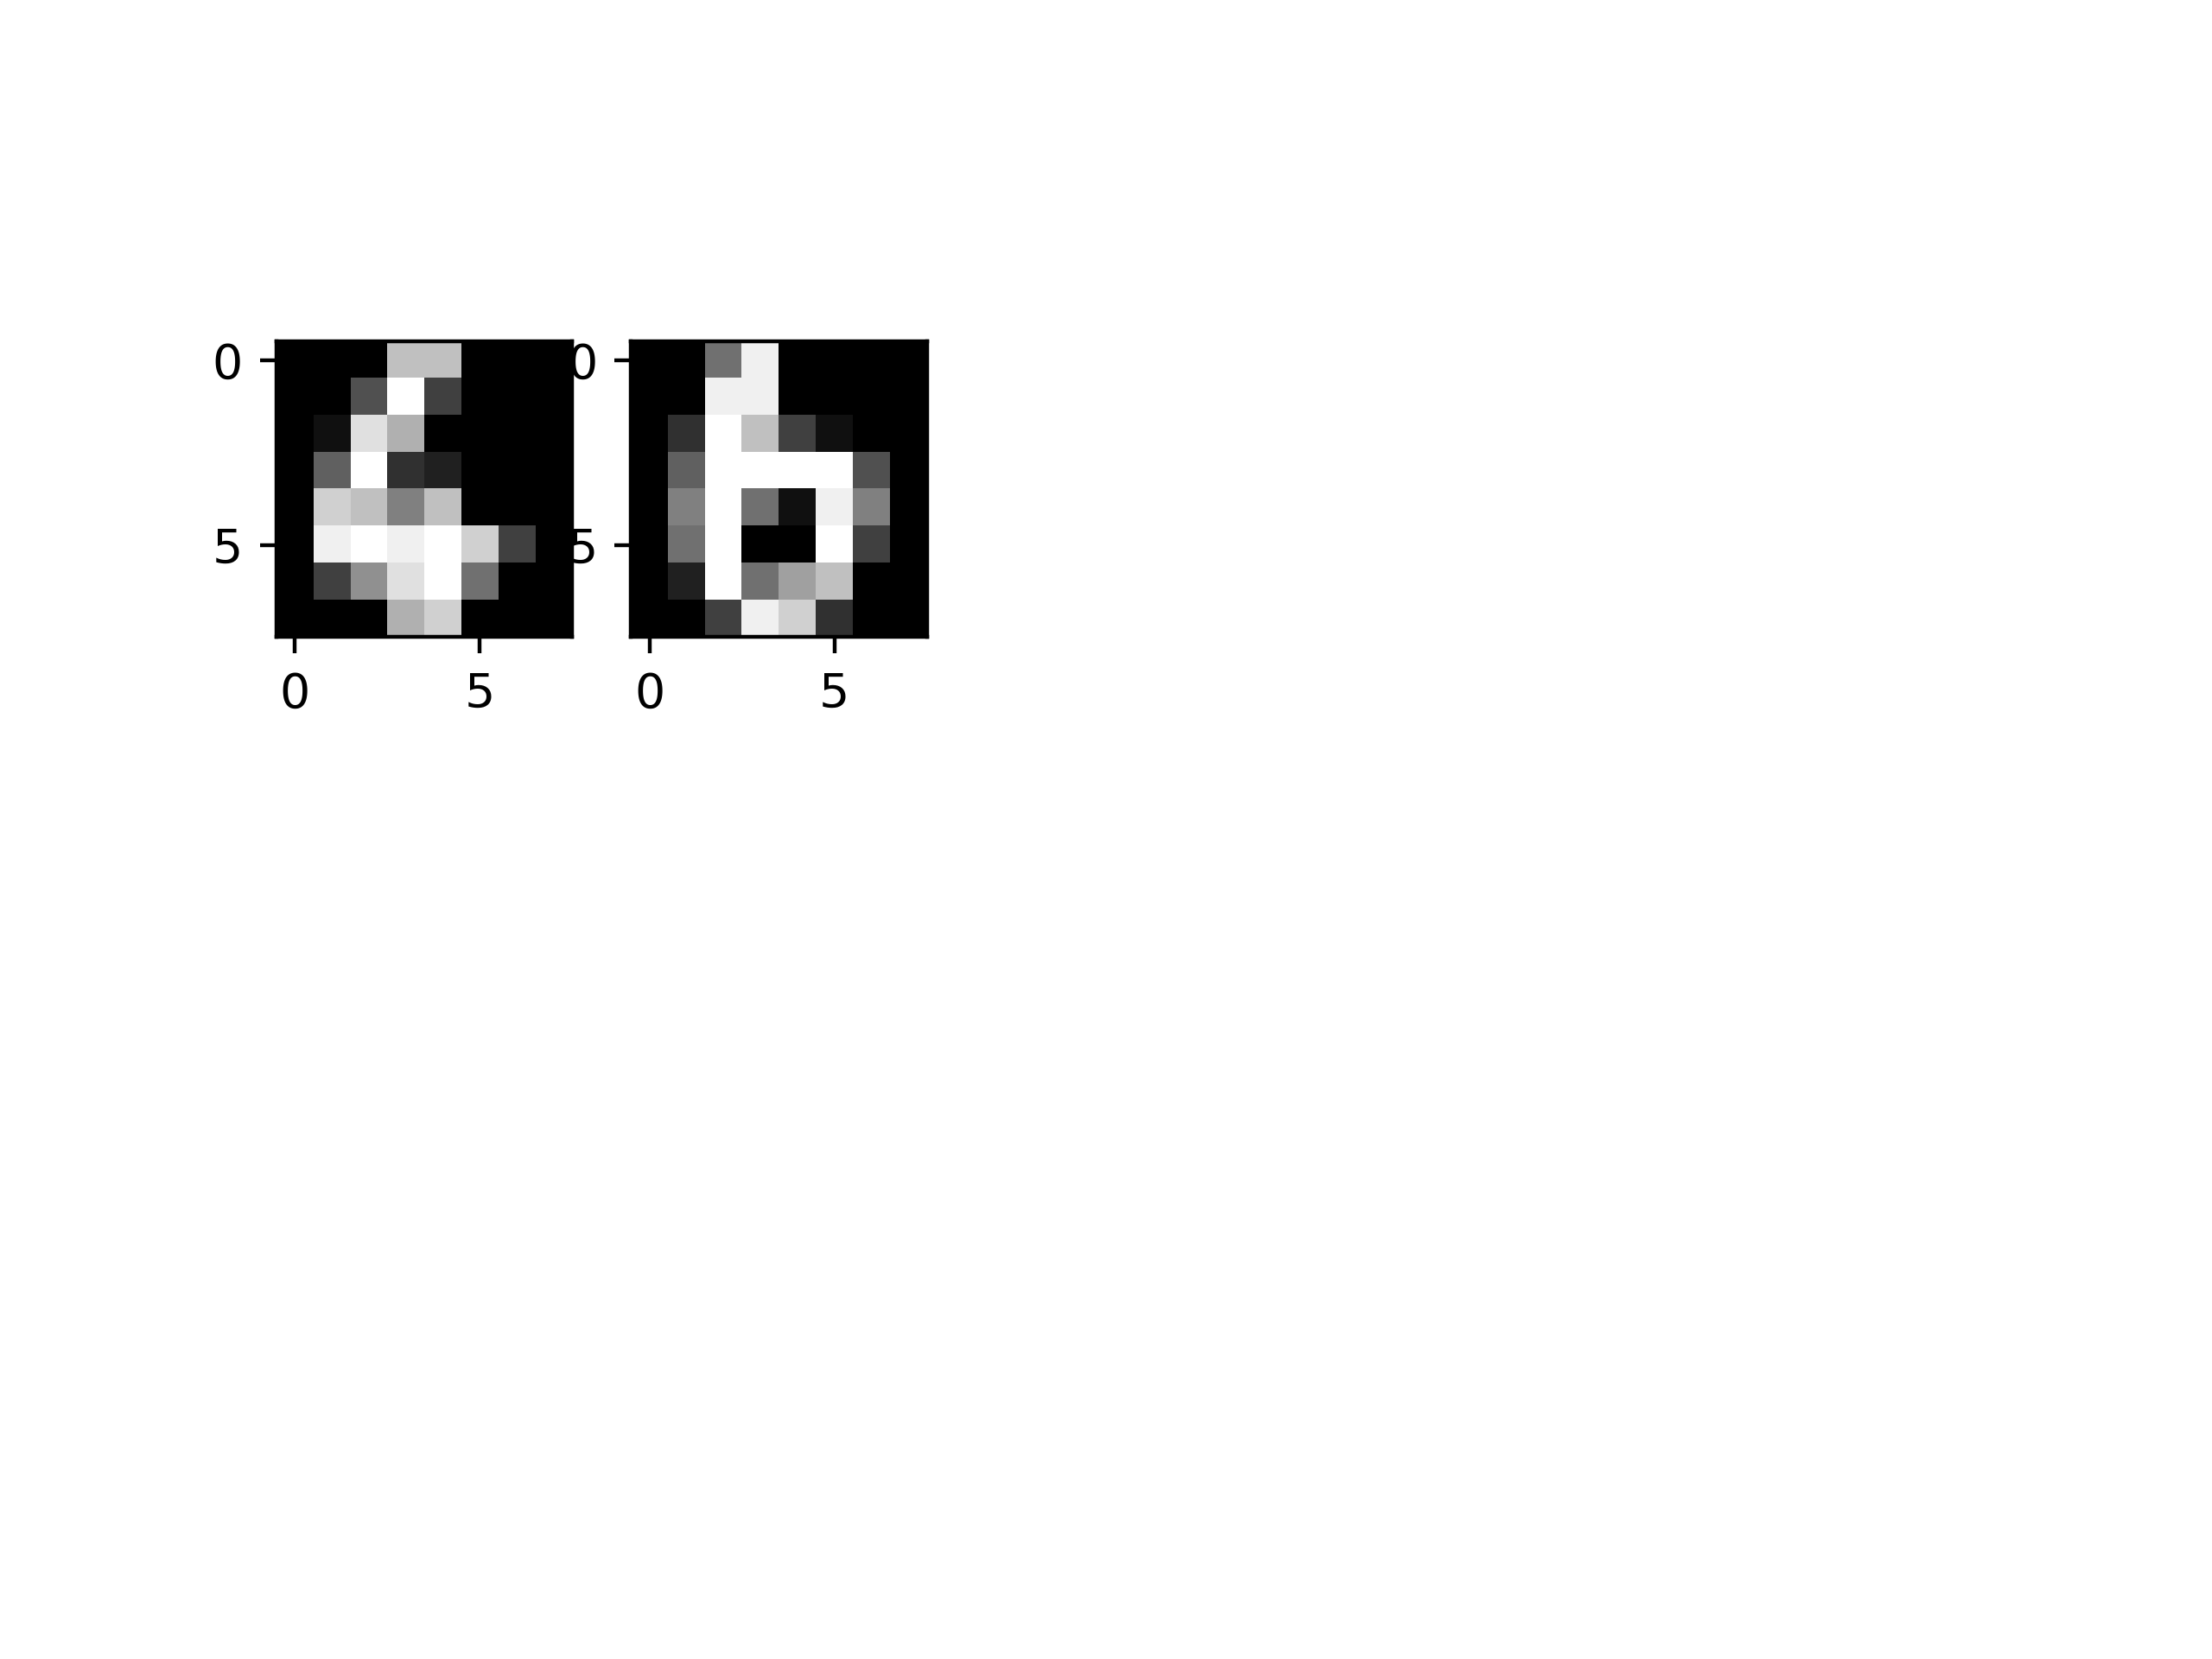

In [11]:
[features_train, features_test, classes_train, classes_test] = model_selection.train_test_split(data_digits.data, new_target, test_size=0.30)


logreg = linear_model.LogisticRegression()
logreg
print("train sizes:", features_train.shape)
print("test sizes:", features_test.shape)
logreg.fit(features_train, classes_train)
res = logreg.predict(features_test)

err_features=features_test[res!=classes_test,:]
print("actual: ",classes_test[res!=classes_test])
print("predict:",res[res!=classes_test])

#Wrong ones
plt.figure()
for i,feat in enumerate(err_features):
    plt.subplot(2, 5, i+1)    
    plt.imshow(feat.reshape(8,8), cmap='gray')

plt.show()

actual:  [ 0.  1.]
predict: [ 1.  0.]


<IPython.core.display.Javascript object>


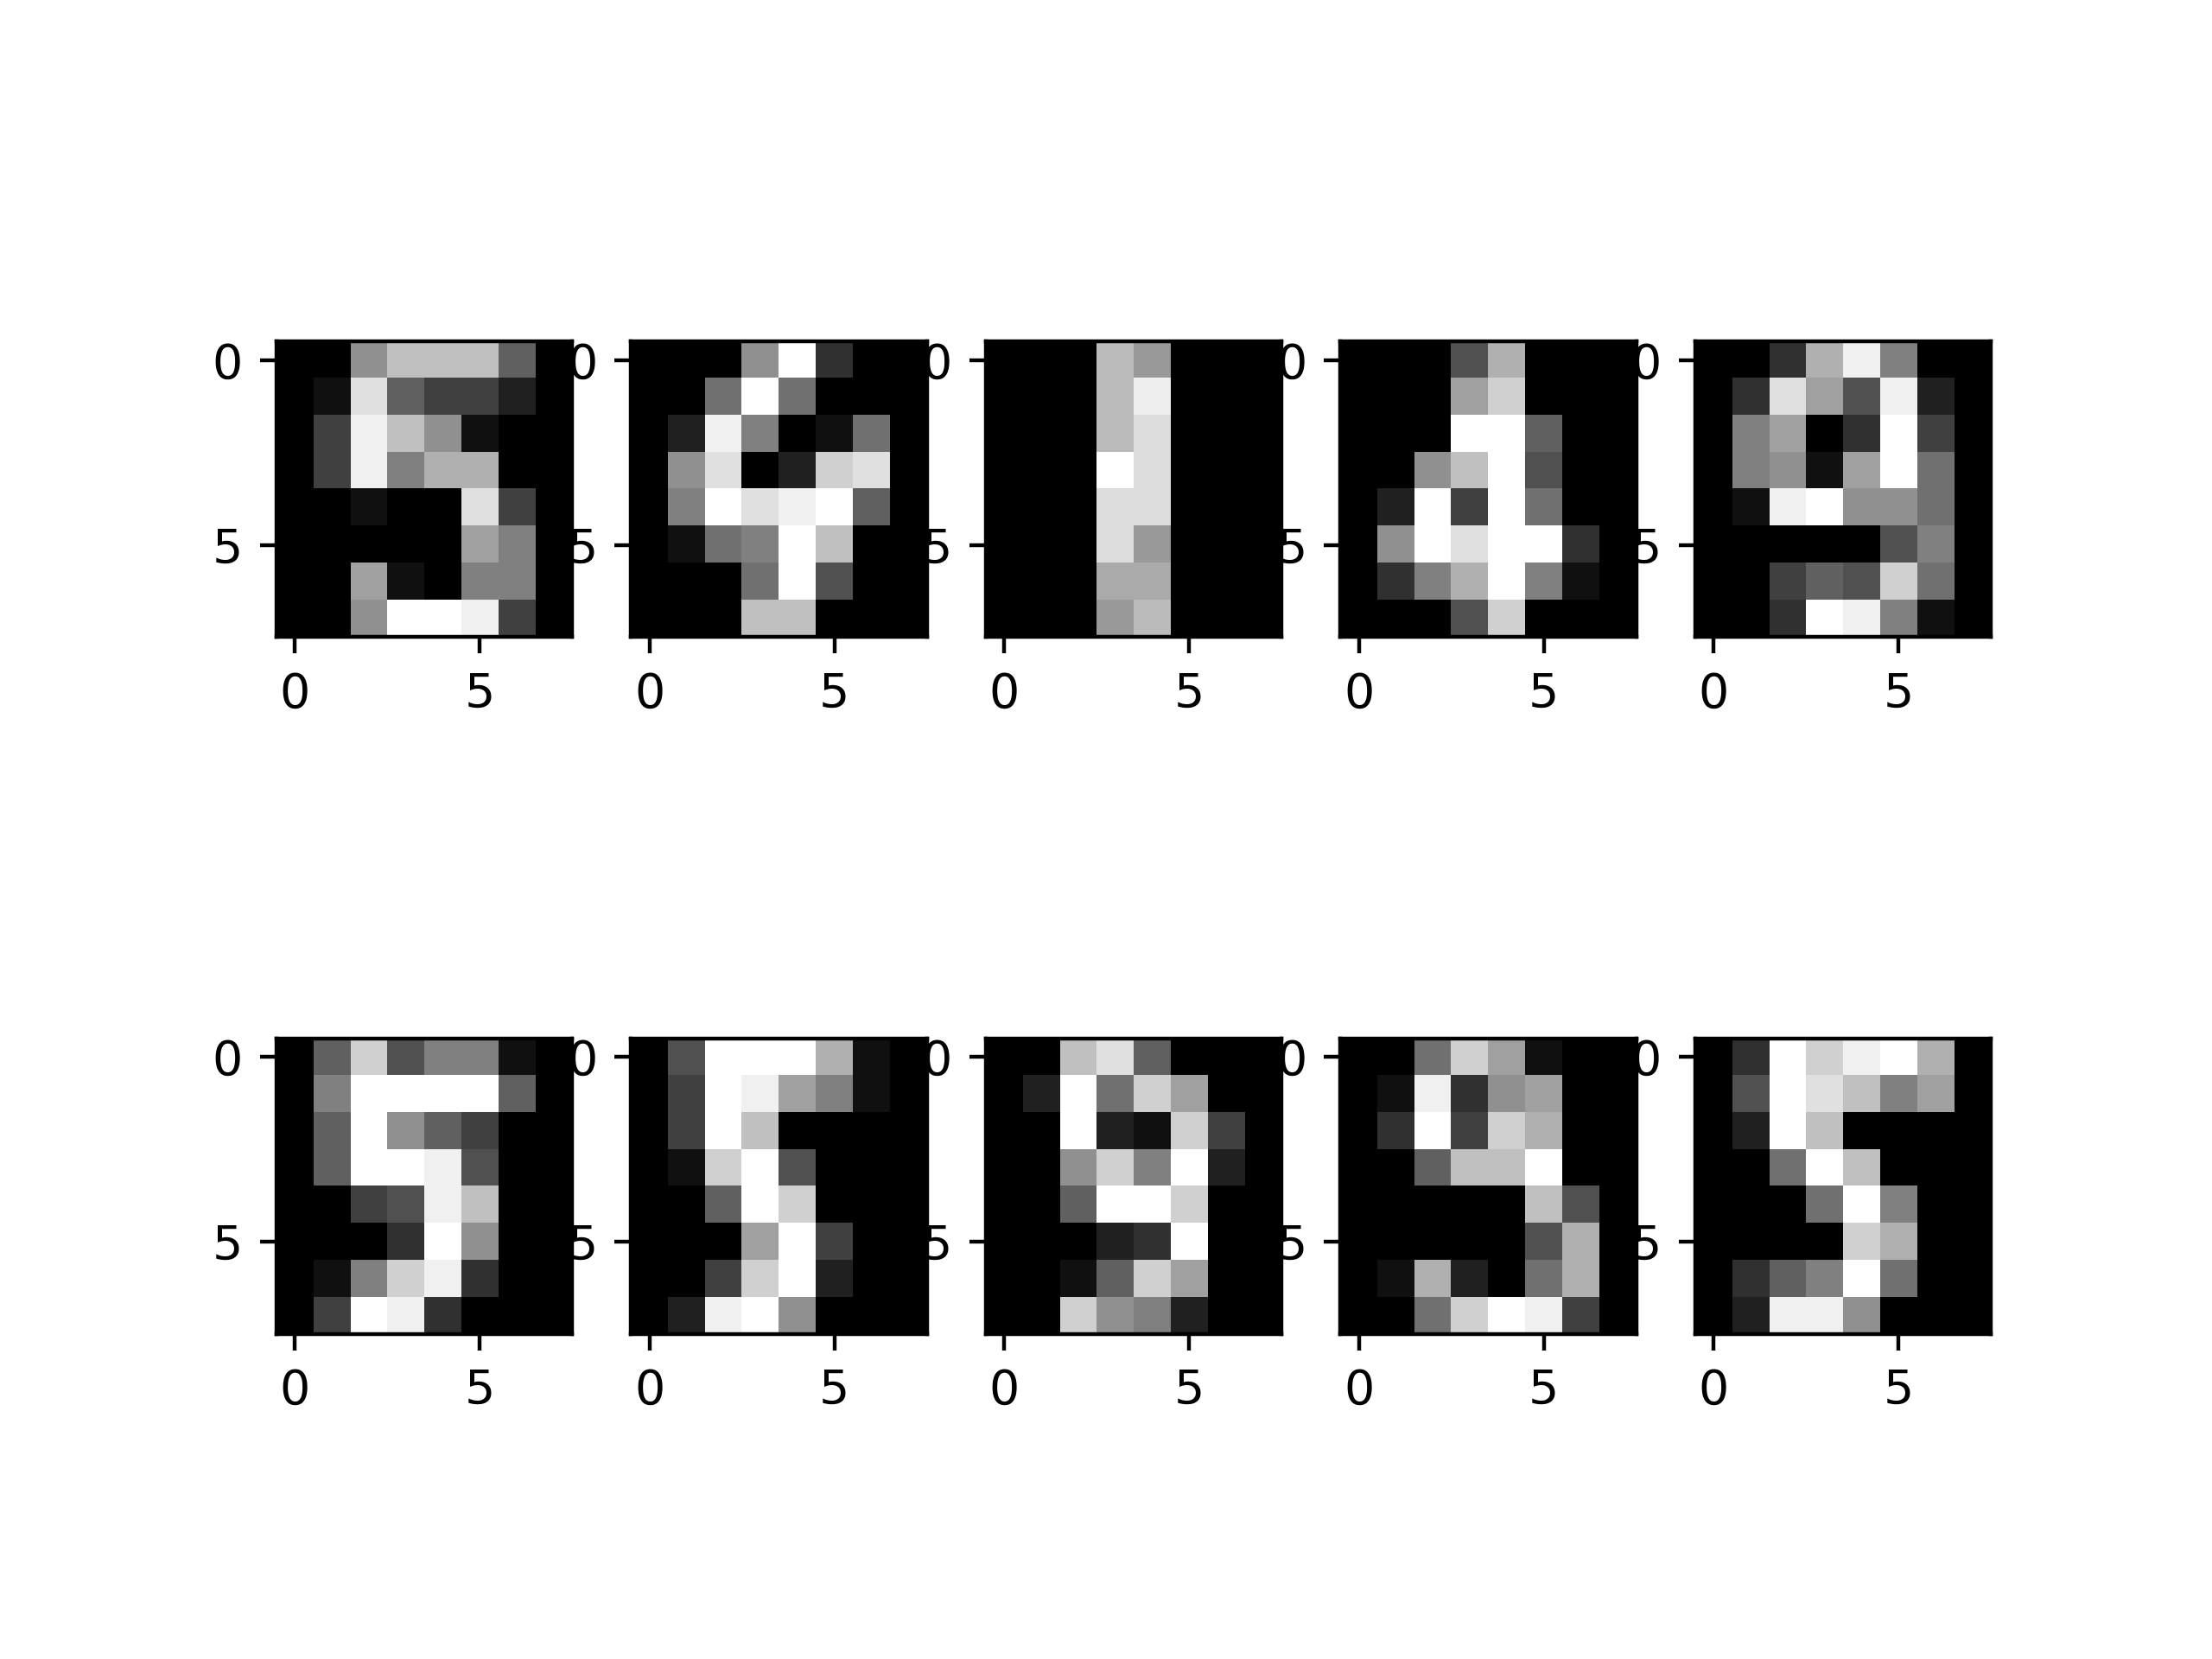

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
score_train: 1.0
score_test: 0.996296296296


In [13]:
ok_features=features_test[res==classes_test,:][:10]
#Some rights
print("actual: ",classes_test[res!=classes_test])
print("predict:",res[res!=classes_test])
plt.figure()
for i,feat in enumerate(ok_features):
    plt.subplot(2, 5, i+1)    
    plt.imshow(feat.reshape(8,8), cmap='gray')

print(classes_test[res==classes_test][:10])

score_train = logreg.score(features_train, classes_train)
score_test = logreg.score(features_test, classes_test)
print("score_train:", score_train)
print("score_test:", score_test)

# Multi Logistic Regression 

---


Da mesma forma, existe uma função $\sigma_k$ que fica activa (aprox. 1) para classes $k$ distintas.
Da mesma maneira, podemos obter um modelo multi paramétrico usando regressão logística.

Vamos ver um exemplo com sklearn:

## Multi Logistic Regression com o Data Set Digits (sklearn)

actual:  [1 6 5 8 9 1 1 8 3 8 4 9 1 5 8 1 8 9 2]
predict: [9 5 9 3 8 8 8 1 5 1 1 5 8 9 1 8 1 8 3]
-------
score_train: 0.994431185362
score_test: 0.964814814815


<IPython.core.display.Javascript object>


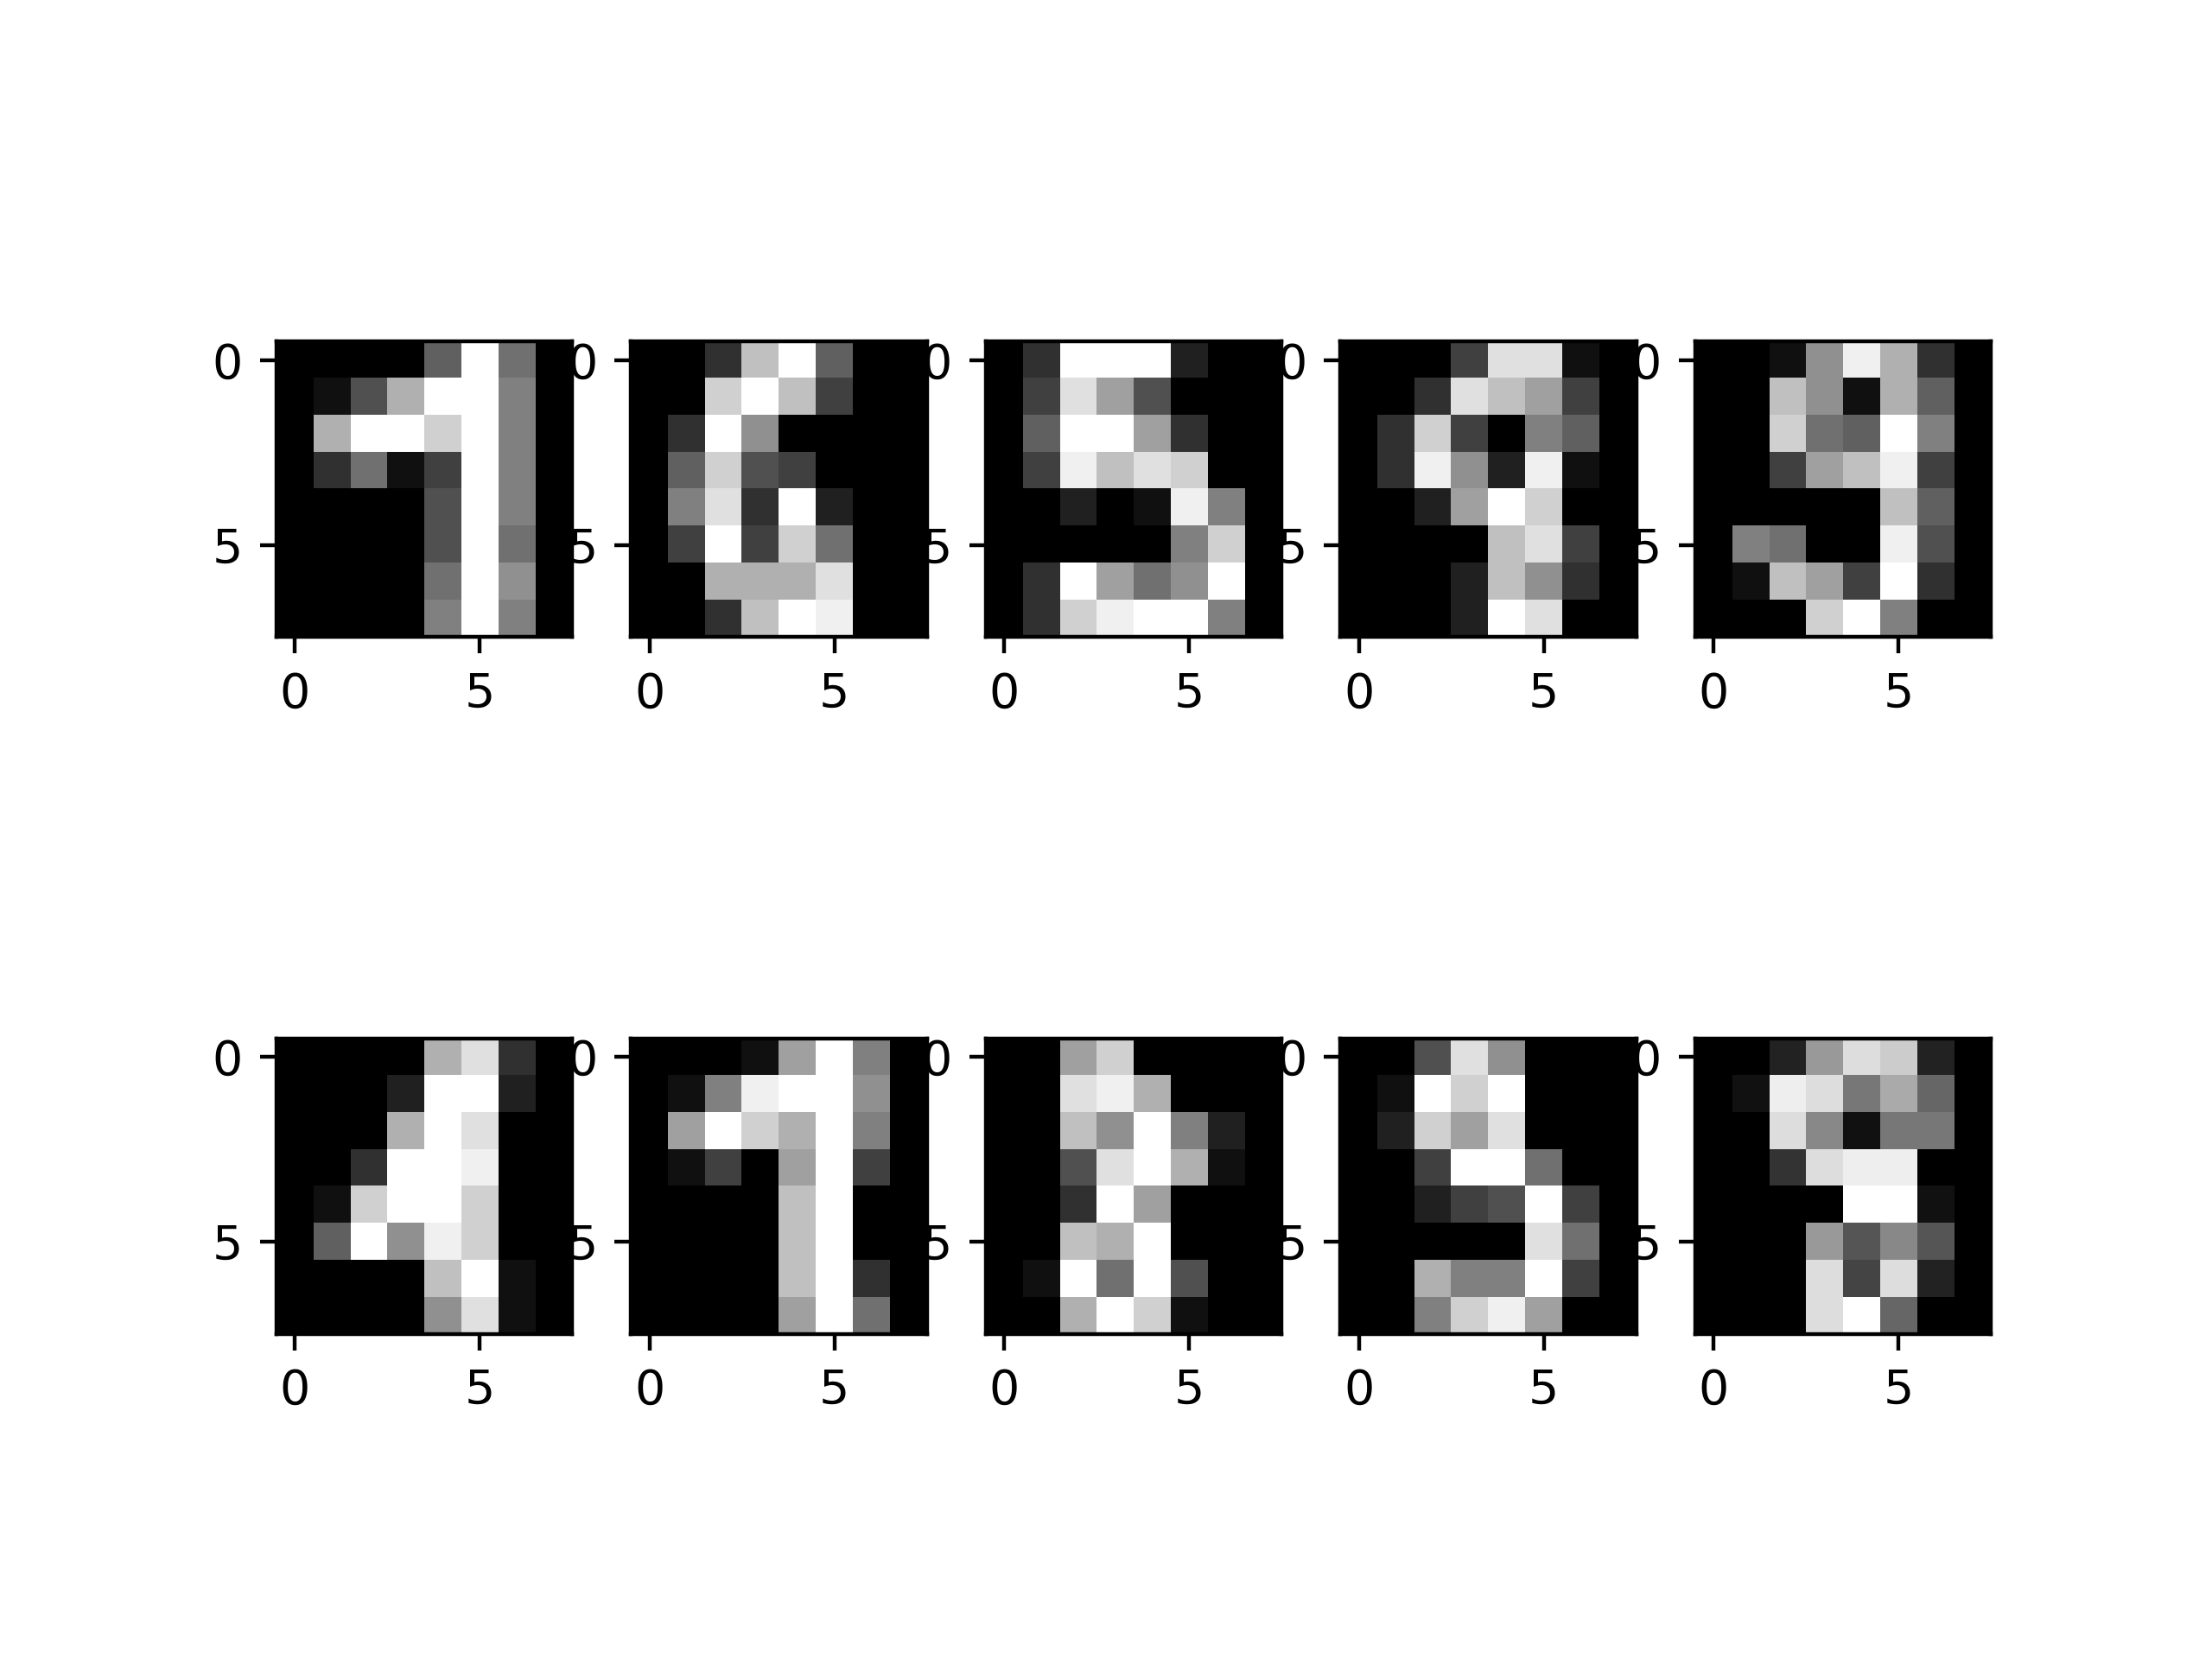

In [14]:
# Start by importing the modules

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



[features_train, features_test, classes_train, classes_test] = model_selection.train_test_split(data_digits.data, data_digits.target, test_size=0.30)


logreg = linear_model.LogisticRegression()
logreg

logreg.fit(features_train, classes_train)
res = logreg.predict(features_test)

err_features=features_test[res!=classes_test,:]
print("actual: ",classes_test[res!=classes_test])
print("predict:",res[res!=classes_test])
print("-------")


score_train = logreg.score(features_train, classes_train)
score_test = logreg.score(features_test, classes_test)
print("score_train:", score_train)
print("score_test:", score_test)

#Wrong ones
plt.figure()
for i,feat in enumerate(err_features[:10]):
    plt.subplot(2, 5, i+1)    
    plt.imshow(feat.reshape(8,8), cmap='gray')

plt.show()

----

---